In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import msprime as msp
from tqdm import tqdm

%matplotlib inline

In [33]:
# Plotting a simple monte-carlo approximation of Theta
mu = 1e-8
L = 1e6
Ne=1e4
theta = 4*Ne*L*mu
ts_reps = msp.simulate(Ne=Ne, sample_size=100, length=L, mutation_rate=mu, num_replicates=5000)
num_muts = np.array([ts.num_mutations for ts in tqdm(ts_reps)])

5000it [00:05, 905.54it/s]


In [34]:
# Wattersons estimator
wat_est = lambda n,k: k / np.sum(1./np.arange(1,n))
theta_est = wat_est(100, num_muts)

400.0 401.473447303806


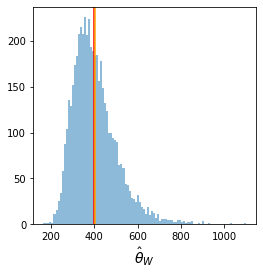

In [40]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(theta_est, alpha=0.5, bins=100);
ax.axvline(theta, color='red')
ax.axvline(np.mean(theta_est), color='orange')
ax.set_xlabel(r'$\hat{\theta}_W$', fontsize=14)
print(theta, np.mean(theta_est))